# CART Feature Importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction. Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

Feature importance scores can provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

Feature importance can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy. This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

We can use the CART algorithm for feature importance implemented in scikit-learn as the DecisionTreeRegressor and DecisionTreeClassifier classes. After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

## CART Classification Feature Selection (Numerical Input & Categorical Output)


In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [3]:
# define the model
model = DecisionTreeClassifier()

In [4]:
# fit the model
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
# get importance
importance = model.feature_importances_

In [6]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01632
Feature: 1, Score: 0.00966
Feature: 2, Score: 0.18977
Feature: 3, Score: 0.30888
Feature: 4, Score: 0.09357
Feature: 5, Score: 0.00860
Feature: 6, Score: 0.16496
Feature: 7, Score: 0.03168
Feature: 8, Score: 0.11985
Feature: 9, Score: 0.05671


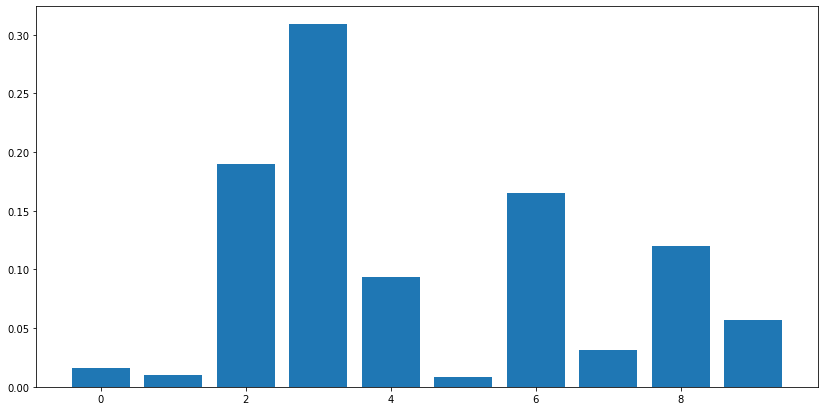

In [7]:
# plot feature importance
plt.figure(figsize=(14,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Running the example fits the model, then reports the coefficient value for each feature. The results suggest perhaps four of the 10 features as being important to prediction.

## CART Regression Feature Selection (Numerical Input & Numerical Output)


In [8]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [9]:
# define the model
model = DecisionTreeRegressor()

In [10]:
# fit the model
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
# get importance
importance = model.feature_importances_

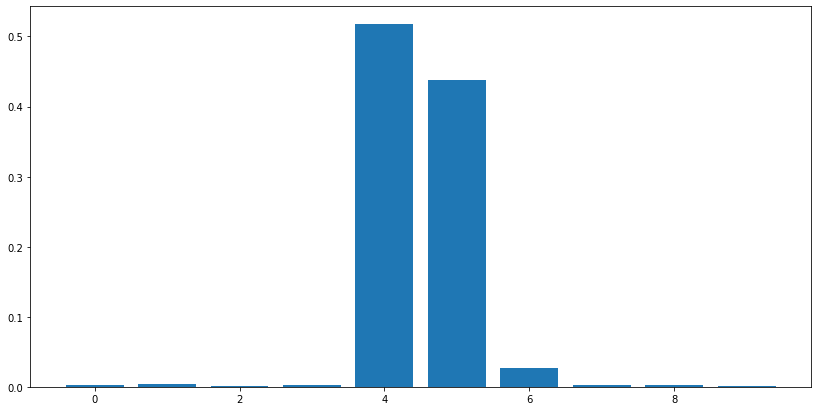

In [12]:
# plot feature importance
plt.figure(figsize=(14,7))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Running the example fits the model, then reports the coefficient value for each feature. The results suggest perhaps three of the 10 features as being important to prediction.